In [1]:
# import pymoo

In [2]:
import os
import numpy as np
from pymooCFD.setupOpt import *

[Errno 17] File exists: 'dump'
[Errno 17] File exists: 'archive'
[Errno 17] File exists: './plots'


In [3]:
checkpointDir = './dump/checkpoint.npy'
plotDir = './plots'

#### Create Directory for Saving Plots

In [4]:
try: 
    os.mkdir(plotDir)
except OSError as err:
    print(err)

[Errno 17] File exists: './plots'


#### Load Data from .npy Checkpoint

In [5]:
checkpoint, = np.load(checkpointDir, allow_pickle=True).flatten()
algorithm = checkpoint

print('Number of individuals in final population: ' + str(len(algorithm.pop.get('X'))))
print('Number of generations: ', str(algorithm.n_gen), str(len(algorithm.callback.data['var'])), str(len(algorithm.callback.data['obj'])))

Number of individuals in final population: 10
Number of generations:  13 13 13


In [6]:
print('FINAL POPULATION')
print('Parameters')
print(algorithm.pop.get('X'))
print('Objectives')
print(algorithm.pop.get('F'))

FINAL POPULATION
Parameters
[[2.7863094035640303 0.32081435548174336]
 [0.10016566250512504 0.20831190152971618]
 [0.3332806242351471 0.11458727831531074]
 [0.17708839859409423 0.3416295934584178]
 [0.5809767992109119 0.11194711212175772]
 [0.10016566250512504 0.21740174474952753]
 [0.10016566250512504 0.4775966898905699]
 [0.10016566250512504 0.22741916381794672]
 [0.15252634586533365 0.30049798277327183]
 [2.7863094035640303 0.3633582586855653]]
Objectives
[[9.35320768e-01 6.12269124e+02]
 [1.14199976e+00 5.13785334e-01]
 [1.11330557e+00 3.12886209e+00]
 [1.13816122e+00 2.63369567e+00]
 [9.97965044e-01 9.28881596e+00]
 [1.14124532e+00 5.36204736e-01]
 [1.13928141e+00 1.17795562e+00]
 [1.14084055e+00 5.60911932e-01]
 [1.13964246e+00 1.71854606e+00]
 [9.88057609e-01 6.93463491e+02]]


In [7]:
print('EVERY GENERATION')
for gen in range(algorithm.n_gen):
    print(f'generation {gen}')
    var_g = algorithm.callback.data['var'][gen]
    obj_g = algorithm.callback.data['obj'][gen]
    for ind in range(len(var_g)):
        var_i = var_g[ind]
        obj_i = obj_g[ind]
        print(f'ind{ind}: ', end='')
        for n in range(len(var_i)):
            print(f'{var_labels[n]}: {var_i[n]}', end=' ')
        print(' // ', end='')
        for n in range(len(obj_i)):
            print(obj_labels[n] + ':' + '%.3f' % obj_i[n], end=' ')
        print()

EVERY GENERATION
generation 0
ind0: Amplitude: 0.10033168697030018 Frequency: 0.3720993153686558  // Drag on Cylinder:1.141 Power Input:0.921 
ind1: Amplitude: 1.2506256752689429 Frequency: 0.5849350606030213  // Drag on Cylinder:1.111 Power Input:224.901 
ind2: Amplitude: 0.17942402027398588 Frequency: 0.703420759160562  // Drag on Cylinder:1.140 Power Input:5.567 
ind3: Amplitude: 1.3101839268646682 Frequency: 0.6028208456011764  // Drag on Cylinder:1.110 Power Input:254.380 
ind4: Amplitude: 0.5071221219261779 Frequency: 0.2782913401763909  // Drag on Cylinder:1.126 Power Input:17.594 
ind5: Amplitude: 0.5255920833696278 Frequency: 0.183104735291918  // Drag on Cylinder:1.191 Power Input:12.434 
ind6: Amplitude: 1.315664091769555 Frequency: 0.7166975503570835  // Drag on Cylinder:1.117 Power Input:304.969 
ind7: Amplitude: 0.6401546129952456 Frequency: 0.411004654338743  // Drag on Cylinder:1.130 Power Input:41.404 
ind8: Amplitude: 1.3093638136374646 Frequency: 0.7482920440979423  

### Scatter Plots

In [8]:
from pymoo.visualization.scatter import Scatter

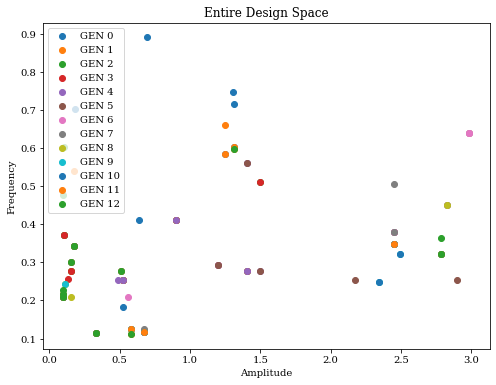

In [9]:
# All design points
if algorithm.n_gen < 15:
    leg = True
else:
    leg = False
plot = Scatter(title='Entire Design Space', legend=leg, labels=var_labels)
for g in range(len(algorithm.callback.data['var'])):  # range(algorithm.n_gen)
    plot.add(algorithm.callback.data['var'][g][:], label='GEN %i' % g)
# if ps is not None:
#     plot.add(ps, plot_type="line", color="black", alpha=0.7)
# plot.add(ps, plot_type="line", color="black", alpha=0.7)
plot.save(plotDir + '/entire_design_space.png')
plot.show()

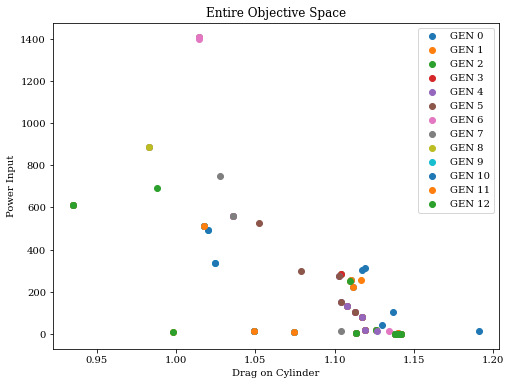

In [10]:
# All objective points
plot = Scatter(title='Entire Objective Space', legend=leg, labels=obj_labels)
for g in range(len(algorithm.callback.data['var'])):
    plot.add(algorithm.callback.data['obj'][g][:], label='GEN %i' % g)
# if pf is not None:
#     plot.add(pf, plot_type="line", color="black", alpha=0.7)
plot.save(plotDir + '/entire_obj_space.png')
plot.show()

### Last 10 Generation of Parameter and Objective Spaces

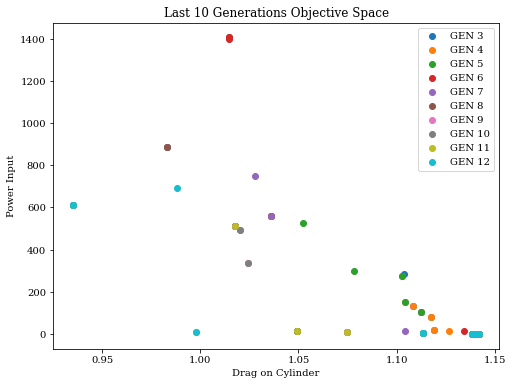

In [11]:
# Last 10 generations
# last 10 gens. design points
if algorithm.n_gen > 10:
    #### Design Space ####
    plot = Scatter(title='Last 10 Generations Design Space', legend=True, labels=var_labels)
    for g in range(algorithm.n_gen-10, algorithm.n_gen):  # algorithm.n_gen == len(algorithm.callback.data['var'])
        plot.add(algorithm.callback.data['var'][g][:], label='GEN %i' % g)
#     if ps is not None:
#         plot.add(ps, plot_type="line", color="black", alpha=0.7)
    plot.save(plotDir + '/final_10_design_space.png')
    ### Objective Space ####
    # last 10 gens. objective points
    plot = Scatter(title='Last 10 Generations Objective Space', legend=True, labels=obj_labels)
    for g in range(len(algorithm.callback.data['obj'])-10, len(algorithm.callback.data['obj'])):  # range(algorithm.n_gen)
        plot.add(algorithm.callback.data['obj'][g][:], label='GEN %i' % g)
#     if pf is not None:
#         plot.add(pf, plot_type="line", color="black", alpha=0.7)
    plot.save(plotDir + '/final_10_obj_space.png')


#### Decision Making 

In [12]:
# if pf is not None:
#     from pymoo.factory import get_decision_making

#     dm = get_decision_making("high-tradeoff")

#     I = dm.do(pf)

#     plot = Scatter(title='Pareto Front: High Tradeoff Points')
#     plot.add(pf, alpha=0.2)
#     plot.add(pf[I], color="red", s=100)
#     plot.save(plotDir + '/pf-high-tradeoff')

### Running Metric

In [13]:
# from pymoo.util.running_metric import RunningMetric

# running = RunningMetric(
#                         delta_gen=5,
#                         # n_plots=4,
#                         only_if_n_plots=True,
#                         key_press=False,
#                         do_show=True)

# running.notify(algorithm)